# WA - King County Home Price Estimate List

In [ ]:
import pandas as pd
pd.set_option("display.max_columns",100)

import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
df=pd.read_csv('kc_house_data.csv')

In [ ]:
# EDA

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.shape

(21613, 21)

In [ ]:
df.sample(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17127,9286100250,20150319T000000,500000.0,3,2.5,1670,2575,2.0,0,0,3,8,1670,0,2000,0,98027,47.5310,-122.047,1670,2897
12492,7853302520,20150206T000000,475000.0,4,2.5,2320,10046,2.0,0,0,3,7,2320,0,2006,0,98065,47.5406,-121.887,2320,5253
8866,8945300090,20140811T000000,205950.0,3,1.0,1490,8239,1.0,0,0,4,6,1490,0,1963,0,98023,47.3060,-122.370,1200,8470


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df['zipcode']=df['zipcode'].astype('category')

In [ ]:
df['age']=2024-df['yr_built']

In [ ]:
df['r_age']=2024-df['yr_renovated']

In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,age,r_age
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652,52.994864,1939.597742
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631,29.373411,401.679240
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000,9.000000,9.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000,27.000000,2024.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000,49.000000,2024.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000,73.000000,2024.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000,124.000000,2024.000000


In [ ]:
df.corr(numeric_only=True)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,age,r_age
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.001891,0.020799,-0.002901,-0.138798,-0.021380,0.016907
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,0.307003,0.021626,0.585379,0.082447,-0.054012,-0.126434
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.008931,0.129473,0.391638,0.029244,-0.154178,-0.018841
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,0.024573,0.223042,0.568634,0.087175,-0.506019,-0.050739
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,0.052529,0.240223,0.756420,0.183286,-0.318049,-0.055363
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.085683,0.229521,0.144608,0.718557,-0.053080,-0.007644
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,0.049614,0.125419,0.279885,-0.011269,-0.489319,-0.006338
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,-0.014274,-0.041910,0.086463,0.030703,0.026161,-0.092885
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.006157,-0.078400,0.280439,0.072575,0.053440,-0.103917
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,-0.014941,-0.106500,-0.092824,-0.003406,0.361417,0.060618


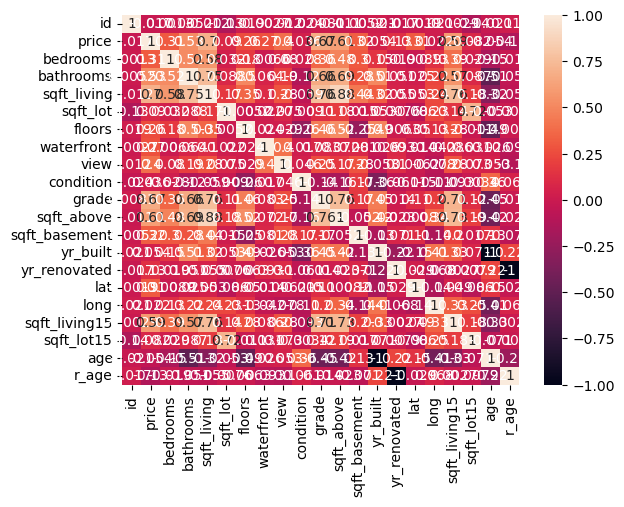

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True);

In [ ]:
df['price'].mean(), df['price'].median(), df['price'].min(), df['price'].max(), df['price'].std()

(540088.1417665294, 450000.0, 75000.0, 7700000.0, 367127.1964826997)

In [ ]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,r_age
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,15,2024
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,10,2024
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,15,2024
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,20,2024
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357,16,2024


In [ ]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
age              0
r_age            0
dtype: int64

In [ ]:
abs(df.corr(numeric_only=True)['price'].sort_values(ascending=False))

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id               0.016762
age              0.054012
r_age            0.126434
Name: price, dtype: float64

In [ ]:
df=df[df['bedrooms']<8]

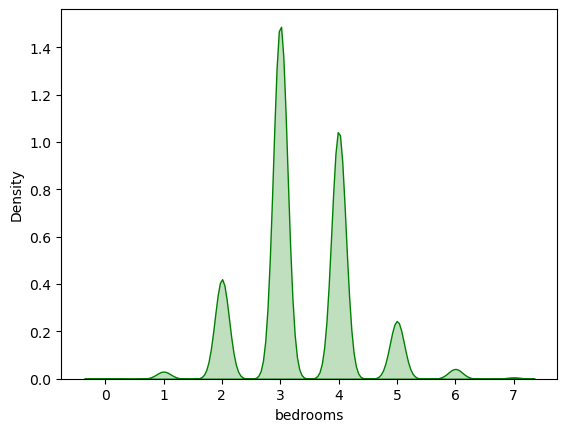

In [ ]:
sns.kdeplot(x=df['bedrooms'],fill=True, color='green');

In [ ]:
df=df[df['price']<2000000]

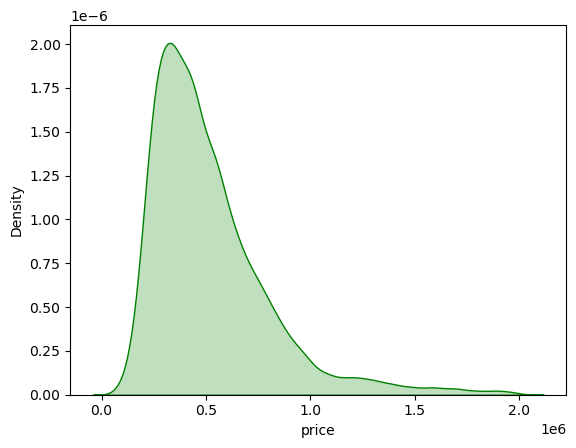

In [ ]:
sns.kdeplot(x=df['price'],fill=True, color='green');

In [ ]:
df['price'].sort_values(ascending=False)

21333    1999950.0
13280    1999000.0
6691     1998000.0
17995    1990000.0
14550    1989000.0
           ...    
8274       82000.0
16198      81000.0
465        80000.0
15293      78000.0
1149       75000.0
Name: price, Length: 21386, dtype: float64

In [ ]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'age', 'r_age'],
      dtype='object')

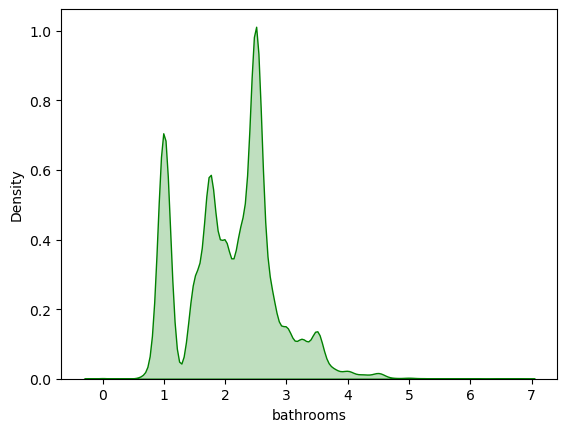

In [ ]:
sns.kdeplot(x=df['bathrooms'],fill=True, color='green');

In [ ]:
df=df[df['bathrooms']<5]

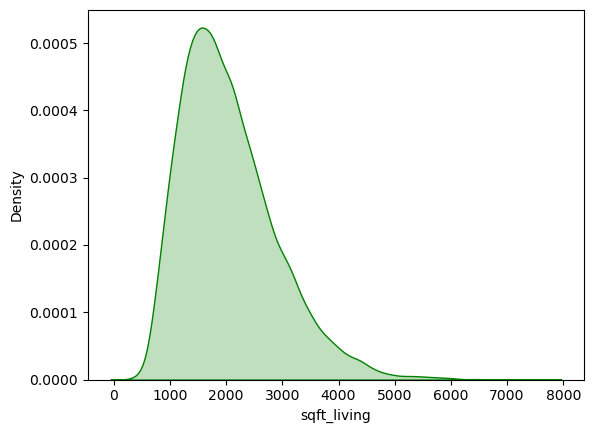

In [ ]:
sns.kdeplot(x=df['sqft_living'],fill=True, color='green');

In [ ]:
df=df[df['sqft_living']<5000]

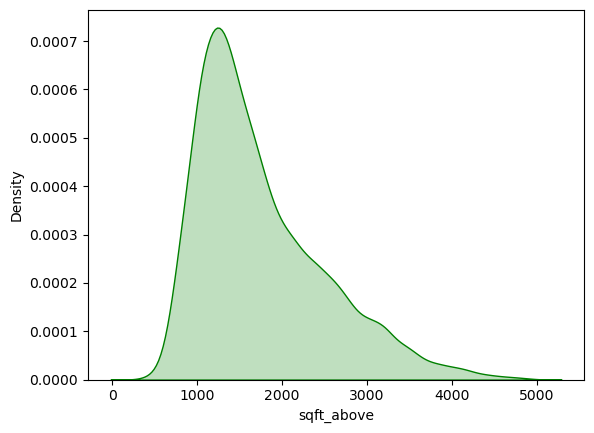

In [ ]:
sns.kdeplot(x=df['sqft_above'],fill=True, color='green');

In [ ]:
df=df[df['sqft_above']<5000]

In [ ]:
df=df[df['sqft_basement']<1500]

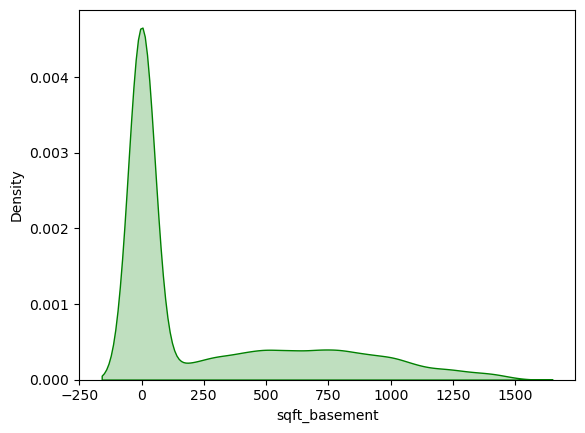

In [ ]:
sns.kdeplot(x=df['sqft_basement'],fill=True, color='green');

In [ ]:
df=df[df['sqft_living15']<4200]

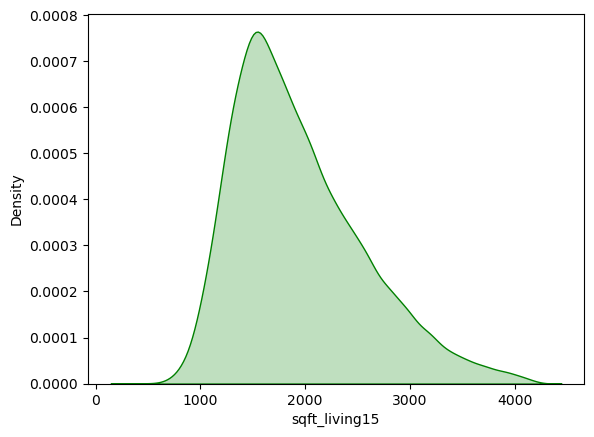

In [ ]:
sns.kdeplot(x=df['sqft_living15'],fill=True, color='green');

In [ ]:
x=df[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'grade',
       'sqft_above', 'sqft_basement', 'zipcode', 'lat', 'sqft_living15', 'age','r_age']]
y=df['price']

In [ ]:
x=pd.get_dummies(x,drop_first=True)

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.20, random_state=42)

In [ ]:
lr=LinearRegression()

In [ ]:
model=lr.fit(x_train, y_train)

In [ ]:
tahmin1=model.predict(x_test)

In [ ]:
mean_squared_error(y_test,tahmin1)**0.5

111801.7678232692

In [ ]:
r2_score(y_test,tahmin1)

0.8305137431609908

In [ ]:
R=Ridge()
L=Lasso()
E=ElasticNet()

In [ ]:
Rmodel=R.fit(x_train,y_train)

In [ ]:
tahmin2=Rmodel.predict(x_test)

In [ ]:
mean_squared_error(y_test,tahmin2)**0.5

111880.17946008829

In [ ]:
r2_score(y_test,tahmin2)

0.8302759230368914

In [ ]:
Lmodel=L.fit(x_train,y_train)

NameError: name 'L' is not defined

In [ ]:
tahmin3=Lmodel.predict(x_test)

In [ ]:
mean_squared_error(y_test,tahmin3)**0.5

111784.43535455706

In [ ]:
r2_score(y_test,tahmin3)

0.8305662895132326

In [ ]:
Emodel=E.fit(x_train,y_train)

C:\Users\MESUT\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.655e+14, tolerance: 1.196e+11
  model = cd_fast.enet_coordinate_descent(


In [ ]:
tahmin4=Emodel.predict(x_test)

In [ ]:
mean_squared_error(y_test,tahmin4)**0.5

172923.92806778115

In [ ]:
r2_score(y_test,tahmin4)

0.5945406393125172

In [ ]:
dt=DecisionTreeRegressor()

In [ ]:
Dmodel=dt.fit(x_train,y_train)

In [ ]:
tahmin5=Emodel.predict(x_test)

In [ ]:
mean_squared_error(y_test,tahmin5)**0.5

172923.92806778115

In [ ]:
r2_score(y_test,tahmin4)

0.5945406393125172

In [ ]:
ET=ExtraTreesRegressor()

In [ ]:
ETmodel=ET.fit(x_train,y_train)

In [ ]:
tahmin6=ET.predict(x_test)

In [ ]:
mean_squared_error(y_test,tahmin6)**0.5

98889.35353708087

In [ ]:
r2_score(y_test,tahmin6)

0.867402229333963